- KEYWORDS: energy balance


![img](//research.bowdoin.edu/dante-today/files/2014/10/kUrkz9vEYkwEJXVcVnQRAtftezh5megi5JKVY2Oxrlw1.jpg)

# Nonisothermal reaction engineering

## Effects of temperature on reactions

### Effects of temperature on volumetric flow

-   When the reaction occurs in the gas-phase we must consider the effect of temperature on the volumetric flow
-   We previously derived this expression for the volumetric flow
    $ \nu = \nu_0 \frac{F_T}{F_{T0}} \frac{P_0}{P} \frac{T}{T_0} \frac{Z}{Z_0} $
    -   Here the 0 subscript indicates the conditions at the entrance of the reactor
-   To use this when the temperature is changing, we must have a mathematical expression for how the temperature is changing
    -   This is analogous to the reactors with pressure drops
    -   There we used the Ergun equation to estimate the pressure as a function of reactor volume or catalyst weight
    -   We will eventually derive equations for the temperature as well
-   There is also an effect of temperature on liquid phase reactions but it is much smaller
    -   If the density is temperature dependent (e.g. due to thermal expansion) it may be necessary to account for this in the design equations
-   For now, we simply remember that one place temperature is important is in the volumetric flow.
-   As a simple example, consider the effect of changing the temperature from 500 K to 600 K. This could occur if the feed temperature was 500K, but the reactor is heated to 600 K. Let us assume there is no pressure drop, no change in moles during the reaction is occurring and that the gas is ideal. If the initial volumetric flowrate is 1 m^3/min, what is the exit volumetric flow rate?

In [1]:
v0 = 1.0  # m^3/min
T0 = 500.0
T1 = 600.0
v = v0 * T1 / T0
print('The new volumetric flow rate is {0:1.2f} m^3/min'.format(v))

The new volumetric flow rate is 1.20 m^3/min

-   The result is a 20% increase in the volumetric flow. Since we compute concentrations from molar flow rates divided by volumetric flow, that would result in a significant error in the concentration if we neglected the effect of temperature.

### Effects of temperature on the equilibrium constant

-   We previously stated that:

<div class="alert alert-warning">
$ K = e^{-\Delta G/(RT)} $
</div>

-   The equilibrium constant is temperature dependent for two reasons
    -   First, there is a temperature inside the exponential function
    -   Second, $\Delta G$ is also temperature dependent as we have seen from the Nist Webbook.
    -   Actually  $\Delta H$ and  $\Delta S$ are temperature dependent too
-   Thus, changing temperature in a reactor will affect
    -   the reaction equilibrium constant
    -   which will affect the possible equilibrium composition that can be obtained
    -   and as a result the exit composition of the reactor
-   Let us reexpress the equilibrium constant like this

\begin{align*}
K &=& e^{-(\Delta H - T\Delta S)/(RT)} \\
  &=& e^{-\Delta H/(RT)}e^{\Delta S/R} \\
\ln K &=& -\Delta H/(RT) + \Delta S/R
\end{align*}

-   It is conventional to express the temperature dependence of $\ln K$ as:

$\frac{d \ln K}{dT} = \frac{\Delta H}{R T^2} $

-   Thus, if $\Delta H > 0$, i.e. the reaction is endothermic, then $\frac{d \ln K}{dT}$ will be positive, and $K$ will increase with temperature
    -   If K increases, the products become more favored
    -   Hence, the rule of thumb that to increase the conversion of an endothermic reaction one should increase the temperature
    -   There are, of course, limits to this
    -   There are safety concerns to consider such as whether something could vaporize, decompose, etc&#x2026;
-   If $\Delta H < 0$, i.e. the reaction is exothermic, then $\frac{d \ln K}{dT}$ will be negative, and $K$ will decrease with temperature
    -   If K decreases, the products will be less favored
    -   Hence, the rule of thumb that to increase the conversion of an exothermic reaction one should decrease the temperature
    -   There are also safety concerns with decreasing the temperature
    -   You must consider whether anything will condense or freeze
-   Let us consider two reactions where $\Delta G (298K) = 0$, but one is exothermic, and one is endothermic. Assuming none of the thermodynamic properties change with temperature, we can integrate to find the equilibrium constant as a function of temperature

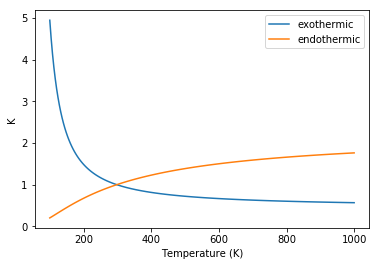

In [3]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

dH1 = -2000.0  # J /mol exothermic reaction
K1 = 1.0

dH2 = +2000.0  # J / mol endothermic reaction
K2 = 1.0

R = 8.314  # J / mol / K


def dlnKdT(lnK, T, dH):
    return dH / R / T**2

# increasing temperature
Tspan1 = np.linspace(298, 1000)
lnK11 = odeint(dlnKdT, np.log(K1), Tspan1, args=(dH1,))
lnK21 = odeint(dlnKdT, np.log(K2), Tspan1, args=(dH2,))

# decreasing temperature
Tspan2 = np.linspace(298, 100)  # go to lower temperature
lnK12 = odeint(dlnKdT, np.log(K1), Tspan2, args=(dH1,))
lnK22 = odeint(dlnKdT, np.log(K2), Tspan2, args=(dH2,))

# we reverse the decreasing temperature results so they link smoothly
Tspan = np.concatenate([Tspan2[::-1], Tspan1])
lnK1 = np.concatenate([lnK12[::-1], lnK11])
lnK2 = np.concatenate([lnK22[::-1], lnK21])

plt.plot(Tspan, np.exp(lnK1), Tspan, np.exp(lnK2))
plt.legend(['exothermic', 'endothermic'], loc='best')
plt.xlabel('Temperature (K)')
plt.ylabel('K')

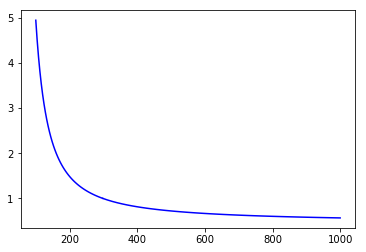

In [10]:
plt.plot(Tspan2, np.exp(lnK12), 'b-', Tspan1, np.exp(lnK11), 'b-')

-   It is important to remember the equilibrium constant changes with temperature *even* if  $\Delta G$ is constant

-   A more common equation to use if the reaction enthalpy is approximately constant is:

<div class="alert alert-warning">
$K(T) = K_1(T) \exp\left [ \frac{-\Delta H (T_1)}{R}\left (\frac{1}{T} - \frac{1}{T_1}\right ) \right ] $
</div>

-   The discussion above focused on the effects of temperature on the equilibrium properties of the reactor

-   We will see next that temperature also affects the *rates*
    -   Since the net rate at equilibrium must be zero
    -   And the equilibrium constant is changing
    -   Then the rates of the forward and backward reactions *must also be changing*
    -   And not the same way (otherwise there would be no change in the equilibrium constant)

### Effects of temperature on the rate constant

-   As we alluded to in the previous section, changes in temperature must affect reaction rates
-   We have already considered the effect of temperature on the volume/density/volumetric flow, which affects rates through the concentration of the species
-   We now consider the effect of temperature on the "rate constant"
-   Actually, the "rate constant" is only constant at a particular temperature
-   The "rate constant" varies dramatically with temperature
-   The most common temperature dependence observed is the Arrhenius equation:

<div class="alert alert-warning">
$ k(T) = A e^{-E_A/(RT)} $
</div>

-   $A$ is called a pre-exponential factor
-   $E_A$ is called an activation energy
-   This equation is known as the Arrhenius equation
-   It is pretty accurate over a broad range of temperatures
-   To motivate the idea behind the functional form of this temperature dependence we must consider transition state theory
-   The reactants are colliding at some rate, and some fraction of those collisions results in a reaction to form products
-   The reactants are in a local minimum of energy,  and the products are in another local minimum of energy
-   To get from one local minimum to another, you must go uphill in energy, and then back down
-   The top of the hill is called a transition state
-   Schematically this looks like:

![img](//www.chemgapedia.de/vsengine/media/vsc/en/ch/12/oc/substitution/sn_2/uebergangszustand/reaktionskoordinate.gif)

-   It takes a certain amount of energy to get over the barrier between the reactants and products
-   It turns out that molecules have a distribution of energies determined by the Boltzman distribution
-   The Arrhenius equation then is interpreted in the following way
    -   $A$ is the frequency at which reactants attempt to go to products
    -   $e^{-E_A/(RT)}$ is the fraction of reactants that have enough energy to get over the barrier
    -   The fraction increases with increasing temperature because "hotter" molecules have more energy
-   If you know the rate constant at one temperature, and the activation energy, then you can readily compute the rate constant at another temperature:

<div class="alert alert-warning">
$ k(T) = k(T_0) \exp \left (\frac{-E_A}{R}\left (\frac{1}{T} - \frac{1}{T_0}\right)\right) $
</div>

-   Let us consider the impact of T on the rate constant

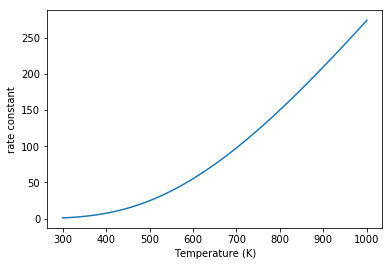

In [1]:
E1 = 20.0  # kJ/mol
R = 8.314e-3

T = np.linspace(300, 1000)

k1_300 = 1.0

k1 = k1_300 * np.exp(-E1 / R * (1.0 / T - 1.0 / 300.0))

plt.plot(T, k1)
plt.xlabel('Temperature (K)')
plt.ylabel('rate constant')

-   Clearly there is a very significant (orders of magnitude) effect of temperature on the rate constant
    -   And consequently on the reaction rate

-   For multiple reactions, the rate of each reaction will be affected differently by temperature
    -   $k_j = A_j e^{-E_j/(RT)}$

-   We can see the effect of temperature on these two reactions by considering the ratio of two rate constants

$\frac{k2}{k1} = \frac{A_2}{A_1} e^{(E_1 - E_2)/(RT)} $

-   The relative rates depend on the ratio of pre-exponential factors and the sign of $E_1 - E_2$
-   If $E_1 - E_2 > 0$ then the ratio $\frac{k2}{k1}$ will decay with increasing temperature to the value $\frac{A_2}{A_1}$

-   On the other hand, if $E_1 - E_2 < 0$ then the ratio $\frac{k2}{k1}$ will increase with increasing temperature to the value $\frac{A_2}{A_1}$

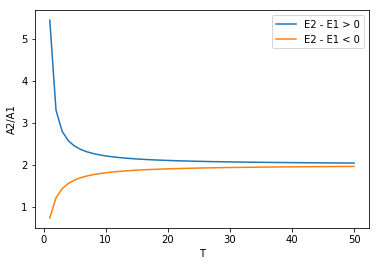

In [1]:
T = np.linspace(1, 50)

A2A1 = 2.0
E1mE2 = 1.0
plt.plot(T, A2A1 * np.exp(1.0/T), T, A2A1*np.exp(-1.0/T))
plt.legend(['E2 - E1 > 0','E2 - E1 < 0'], loc='best')
plt.xlabel('T')
plt.ylabel('A2/A1')

### Summary

-   Clearly temperature plays an important role in all the properties of reactions that affect reactor design
-   If the temperature changes during a reaction, we expect significant changes to occur in
    -   the rate constants,
    -   gas-phase volumetric flow rates
    -   equilibrium constants
-   These all affect reactor design
-   To avoid these effects, we must keep the reactor isothermal
    -   which means we either put heat in or take it out at the right rate to balance any temperature change caused by reaction
    -   We need to be able to determine the rate of heat removal
-   If the reactor is not isothermal, the temperature will change
    -   With corresponding non-linear changes in reaction rate
-   Either way, we need a model that tells us about the heat generation and temperature changes in the reactor
-   We get this from an energy balance.

## Review of reaction energies

-   The reaction enthalpy is defined as

$ \Delta H_{rxn} = \sum_j \alpha_j H_j $

-   $H_j$ is the enthalpy of each species in a reaction
-   $\alpha_j$ is the stoichiometric coefficent for each species
-   This equation is the enthalpy of products minus the enthalpy of reactants
-   The enthalpy is a function of temperature

$H_j(T) = H_j(T_R) + \int_{T_R}^T C_{p,j}(T) dT $

-   A common simplification for constant $C_P$ is
-   $H_j - H_{j0} = C_{p,j} (T - T_0)$
-   Because the individual enthalpies are temperature dependent, the reaction enthalpy may also be temperature dependent
-   Let us define $\Delta C_p = \sum_j \alpha_j C_{p,j}$. then

<div class="alert alert-warning">
$ \Delta H_{rxn}(T) = \Delta H_{rxn}(T_R) + \Delta C_p(T - T_R) $
</div>

## General energy balance

-   In reactor systems  we usually only need to consider the internal energy $U$ and how it changes during reactions.
-   $U$ is a conserved quantity, and we can write a general balance equation where we consider the rate of accumulation of $U$ in a control volume as the flow of energy in minus the flow of energy out plus the rate heat crosses the boundaries plus the rate of work done on the system

$\frac{dU}{dt} = \sum_j F_{j,in} \overline{U}_{j,in} - \sum_j F_{j,out} \overline{U}_{j,out} + \dot{W} + \dot{Q} $
where:

-   $\dot{Q}$ is the rate that heat crosses the boundaries
-   $\dot{W}$ is the rate of work done on the system
-   $U_{j,in}$ is the internal energy of species $j$ entering the volume
-   $U_{j,out}$ is the internal energy of species $j$ leaving the system (it may be different if the temperature or pressure changes
-   Note that $U$ is extensive: It is the system internal energy
-   $\overline{U}$ is the partial molar internal energy
-   There are three relevant forms of work that we consider
    -   $\dot{W_b} = -P\frac{dV}{dt}$
        -   this is the work done if the volume changes
    -   $\dot{W_f} = \sum_j F_{j,in} \overline{V}_{j,in} P_{in} - \sum_j F_{j,out} \overline{V}_{j,out} P_{out}$
        -   this is the work done to flow mass across the boundaries. It is important if the pressure or molar volumes change.
    -   $\dot{W_s}$ is the shaft work if there are stirrers or significant mixing work
-   Plugging these definitions in leads to

\begin{multline}
\frac{dU}{dt} = \sum_j F_{j,in} \overline{U}_{j,in} - \sum_j F_{j,out} \overline{U}_{j,out} \\
-P \frac{dV}{dt} \\
+ \sum_j F_{j,in}\overline{V}_{j,in} P_{in} - \sum_j F_{j,out} \overline{V}_{j,out} P_{out}\\
+ \dot{W_s} + \dot{Q}
\end{multline}

-   Recall that $\overline{H} = \overline{U} + p \overline{V}$
-   We can simplify the energy balance now to

$\frac{dU}{dt} = \sum_j F_{j,in} \overline{H}_{j,in} - \sum_j F_{j,out} \overline{H}_{j,out}  -P \frac{dV}{dt} + \dot{W_s} + \dot{Q} $

-   It is convenient to use enthalpy rather than internal energy, so we consider the following:

$H = U + PV$

$dH = dU + PdV + VdP$

$dU = dH - PdV - VdP$

-   We take the time derivative and substitute for $dU/dt$ to arrive at

$\frac{dH}{dt} - V\frac{dP}{dt} = \sum_j F_{j,in} \overline{H}_{j,in} - \sum_j F_{j,out} \overline{H}_{j,out} + \dot{W_s} + \dot{Q} $

-   Now, we consider that $H = H(T, P, n_j)$ and that $T$, $P$ and $n_j$ may also be changing in time
-   We express the total derivative of $H$ as

$ dH = (\frac{\partial H}{\partial T})_{P,n_j} dT + (\frac{\partial H}{\partial P})_{T,n_j} dP + (\frac{\partial H}{\partial n_j})_{T, P} dn_j$

-   Recognize the following partial derivatives:
    1.  $\frac{\partial H}{\partial T} = C_p$
    2.  $\frac{\partial H}{\partial P} = V(1 - \alpha T)$
    3.  $\frac{\partial H}{\partial n_j} = \overline{H_j}$
-   This leads to:


$\sum N_i C_{p,i} \frac{dT}{dt} + \\
  V(1 - \alpha T) \frac{dP}{dt} + \\
  \sum_j \overline{H}_j \frac{dn_j}{dt} = \sum_j F_{j,in} \overline{H}_{j,in} - \sum_j F_{j,out} \overline{H}_{j,out} + \dot{W_s} + \dot{Q}$

-   This is the basic energy balance we need to assess changes in energy and temperature in reactors
-   You can see it is coupled to the mole balance via the terms containing molar flows $F_j$ and $\frac{dn_j}{dt}$.
-   Further generalization of this equation is not possible without specifying the reactor type and conditions.
-   There are many special, simplified scenarios
-   That we start considering next time